In [ ]:
pip install yfinance

Available Expiration Dates:
{Timestamp('2023-10-03 23:59:59'), Timestamp('2024-03-15 23:59:59'), Timestamp('2023-10-05 23:59:59'), Timestamp('2024-05-17 23:59:59'), Timestamp('2024-06-28 23:59:59'), Timestamp('2024-03-28 23:59:59'), Timestamp('2023-10-11 23:59:59'), Timestamp('2023-09-13 23:59:59'), Timestamp('2023-09-28 23:59:59'), Timestamp('2023-09-18 23:59:59'), Timestamp('2023-10-02 23:59:59'), Timestamp('2024-01-19 23:59:59'), Timestamp('2023-09-12 23:59:59'), Timestamp('2024-08-16 23:59:59'), Timestamp('2025-12-19 23:59:59'), Timestamp('2023-09-11 23:59:59'), Timestamp('2023-09-14 23:59:59'), Timestamp('2023-10-09 23:59:59'), Timestamp('2023-09-25 23:59:59'), Timestamp('2023-09-27 23:59:59'), Timestamp('2023-09-22 23:59:59'), Timestamp('2023-09-15 23:59:59'), Timestamp('2023-09-20 23:59:59'), Timestamp('2023-10-04 23:59:59'), Timestamp('2024-04-19 23:59:59'), Timestamp('2023-11-17 23:59:59'), Timestamp('2024-07-19 23:59:59'), Timestamp('2023-12-29 23:59:59'), Timestamp('2023-09-

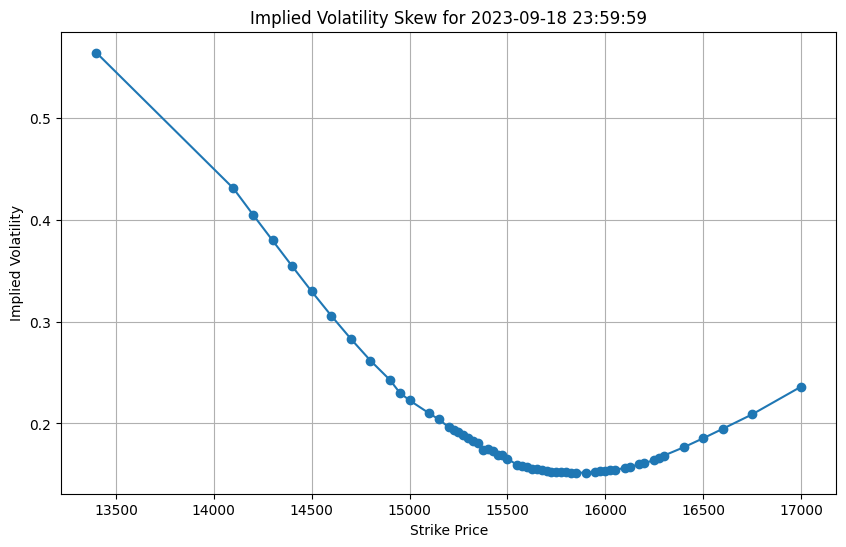

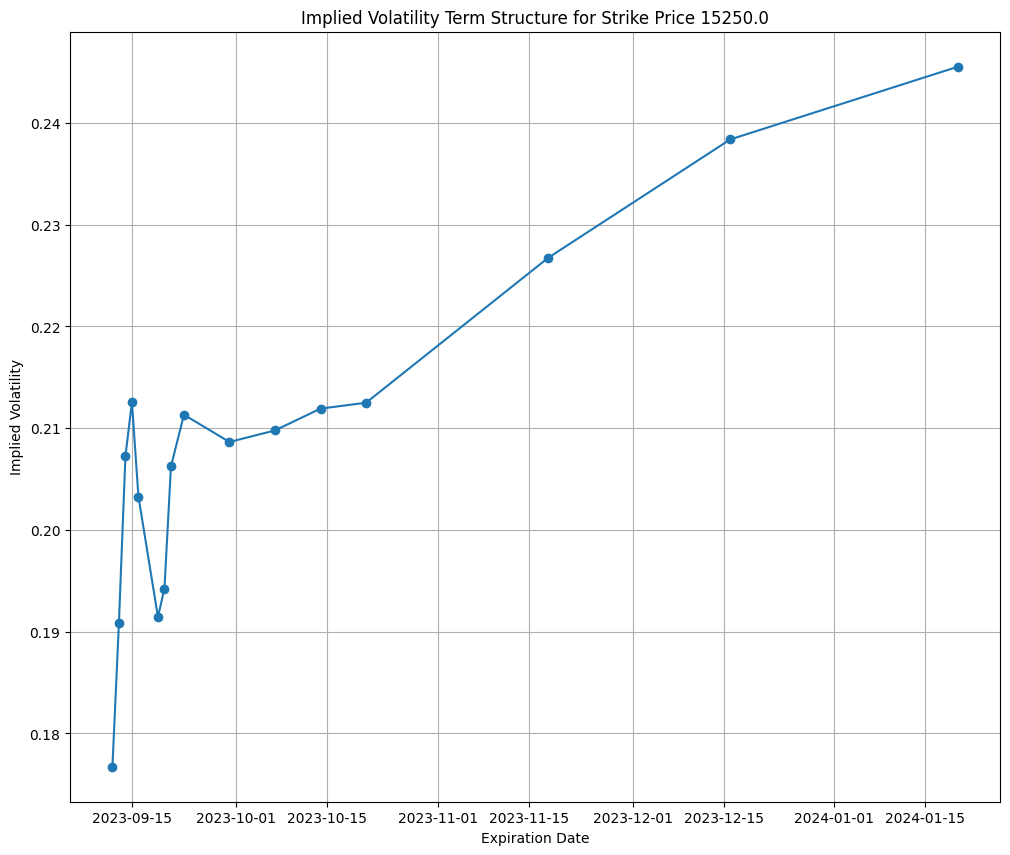

In [ ]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

def fetch_option_data(ticker):
    Ticker = yf.Ticker(ticker)
    expirations = Ticker.options
    option_data = pd.DataFrame()

    for expiration in expirations:
        option_chain = Ticker.option_chain(expiration)
        calls = option_chain.calls
        calls['Option Type'] = 'Call'
        puts = option_chain.puts
        puts['Option Type'] = 'Put'

        options = pd.concat([calls, puts])
        options['Expiration Date'] = pd.to_datetime(expiration) + pd.DateOffset(hours=23, minutes=59, seconds=59)

        option_data = pd.concat([option_data, options])

    option_data["Days to Expiration"] = (option_data['Expiration Date'] - dt.datetime.today()).dt.days + 1

    return option_data

options_data = fetch_option_data("^NDX")
call_options = options_data[options_data["Option Type"] == 'Call']

print("Available Expiration Dates:")
print(set(call_options['Expiration Date']))

chosen_expiry_date = "2023-09-18 23:59:59"
selected_calls_at_expiry = call_options[call_options["Expiration Date"] == chosen_expiry_date]
filtered_calls_at_expiry = selected_calls_at_expiry[selected_calls_at_expiry["impliedVolatility"] >=0.005]
filtered_calls_at_expiry.set_index("strike", inplace=True)

plt.figure(figsize=[10, 6])
plt.plot(filtered_calls_at_expiry.index, filtered_calls_at_expiry["impliedVolatility"], marker='o', linestyle='solid')
plt.title(f"Implied Volatility Skew for {chosen_expiry_date}")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.grid(True)

selected_strike_price = 15250.0
selected_calls_at_strike = call_options[call_options["strike"] == selected_strike_price]
filtered_calls_at_strike = selected_calls_at_strike[selected_calls_at_strike["impliedVolatility"] >= 0.001]
filtered_calls_at_strike.set_index("Expiration Date", inplace=True)

plt.figure(figsize=(12, 10))
plt.plot(filtered_calls_at_strike.index, filtered_calls_at_strike["impliedVolatility"], marker='o', linestyle='solid')
plt.title(f"Implied Volatility Term Structure for Strike Price {selected_strike_price}")
plt.xlabel("Expiration Date")
plt.ylabel("Implied Volatility")
plt.grid(True)
